<a href="https://colab.research.google.com/github/ishancoderr/GANs/blob/main/001_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time 

In [34]:
(train_images,train_lables),(test_images,test_labls)=tf.keras.datasets.mnist.load_data()

5


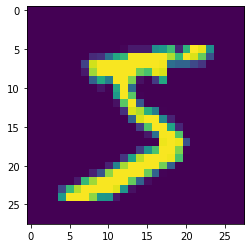

In [35]:
plt.imshow(train_images[0])
print(train_lables[0])

7


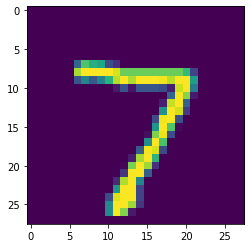

In [36]:
plt.imshow(test_images[0])
print(test_labls[0])

In [37]:
train_images=train_images.reshape(train_images.shape[0],28,28,1)

In [60]:
train_images=(train_images)

In [62]:
type(train_images)
print(train_images)

[[[[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  ...

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]]


 [[[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  ...

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]]


 [[[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  [[-1.]
   [-1.]
   [-1.]
   ...
   [-1.]
   [-1.]
   [-1.]]

  ...

  [[-1.]
   [-1.]
   [-1.]
   

In [63]:
BUFFER_SIZE=train_images.shape[0]
BATCH_SIZE=100
train_dataset=tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Discriminator Model

In [64]:
def make_discriminator_model():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Conv2D(7,(3,3),padding="same",input_shape=(28,28,1)))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.LeakyReLU())
  model.add(tf.keras.layers.Dense(50,activation="relu"))
  model.add(tf.keras.layers.Dense(1))
  return model

In [65]:
model_discriminator = make_discriminator_model()

In [66]:
model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.58452487]], dtype=float32)>

In [67]:
discriminator_optimizer = tf.optimizers.Adam(1e-3)

In [68]:
def get_discriminator_loss(real_predictions,fake_predictions):
  real_predictions =tf.sigmoid(real_predictions)
  fake_predictions =tf.sigmoid(fake_predictions)
  real_loss =tf.losses.binary_crossentropy(tf.ones_like(real_predictions),real_predictions)
  fake_loss =tf.losses.binary_crossentropy(tf.zeros_like(fake_predictions),fake_predictions)
  return fake_loss+real_loss

In [69]:
def make_generator_model():
  model=tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(7*7*256,input_shape =(100,)))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Reshape((7,7,256))) 
  model.add(tf.keras.layers.Conv2DTranspose(128,(3,3),padding="same")) 
  model.add(tf.keras.layers.BatchNormalization())  
  model.add(tf.keras.layers.Conv2DTranspose(64,(3,3),strides=(2,2),padding="same"))
  model.add(tf.keras.layers.BatchNormalization())  
  model.add(tf.keras.layers.Conv2DTranspose(1,(3,3),strides=(2,2),padding="same"))
  return model

In [70]:
generator = make_generator_model()

In [71]:
generator_optimizer =tf.optimizers.Adam(1e-4)

In [72]:
def get_generator_loss(fake_predictions):
    fake_predictions = tf.sigmoid(fake_predictions)
    fake_loss = tf.losses.binary_crossentropy(tf.ones_like(fake_predictions),fake_predictions)
    return fake_loss

Train

In [73]:
def train(dataset,epochs):
  for _ in range(epochs):
    for images in dataset:
      images =tf.cast(images,tf.dtypes.float32)
      train_step(images)

In [74]:
def train_step(images):
  fack_image_noise=np.random.randn(BATCH_SIZE,100).astype("float32")
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_type:
    genarated_images =generator(fack_image_noise)
    real_output = model_discriminator (images)
    fake_output =model_discriminator (genarated_images)

    gen_loss =get_generator_loss(fake_output)
    disc_loss= get_discriminator_loss(real_output,fake_output)
    
    gradients_of_generator = gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator = disc_type.gradient(disc_loss,model_discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator,model_discriminator.trainable_variables))

    print("generator loss:",np.mean(gen_loss))
    print("discriminator loss:",np.mean(disc_loss))

In [75]:
train(train_dataset,2)

generator loss: 0.711156
discriminator loss: 1.4455982
generator loss: 0.7330322
discriminator loss: 0.8099678
generator loss: 0.7765998
discriminator loss: 0.6437423
generator loss: 0.83837616
discriminator loss: 0.5733627
generator loss: 0.93054146
discriminator loss: 0.5039656
generator loss: 1.0207658
discriminator loss: 0.44849902
generator loss: 1.1384839
discriminator loss: 0.38790482
generator loss: 1.285219
discriminator loss: 0.32540837
generator loss: 1.4613123
discriminator loss: 0.26603094
generator loss: 1.6256636
discriminator loss: 0.22180177
generator loss: 1.8327615
discriminator loss: 0.17663348
generator loss: 2.0557785
discriminator loss: 0.13985217
generator loss: 2.2782688
discriminator loss: 0.11125901
generator loss: 2.567235
discriminator loss: 0.08350337
generator loss: 2.8168168
discriminator loss: 0.065261625
generator loss: 3.1378183
discriminator loss: 0.04702997
generator loss: 3.3663328
discriminator loss: 0.037087914
generator loss: 3.5928652
discrimin

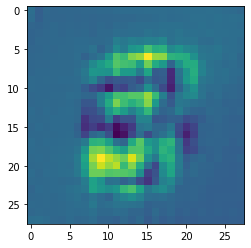

In [76]:
plt.imshow(tf.reshape(generator(np.random.randn(1,100)),(28,28)),cmap="viridis")